In [1]:
import pandas as pd
data=pd.read_csv('data_usable.tsv', sep='\t', encoding = 'utf-8')

In [2]:
data.head()

,년도,가수,제목,장르,가사
0,19920000,잼,난 멈추지 않는다,댄스,"['이제', '다시', '시작', '내겐', '시간', '있다', '때론', '상처..."
1,19920000,잼,우리 모두 사랑하자,댄스,"['모두', '사랑', '우리', '젊다', '모두', '가볍다', '스텝', '그..."
2,19920000,잼,이유,발라드,"['어둠', '이제', '우리', '시간', '가슴속', '긴머리', '향기', '..."
3,19920000,잼,18번가의 비밀,댄스,"['끝없다', '어둠', '있다', '야릇하다', '느낌', '거리', '싸늘하다'..."
4,19920000,잼,요즘 친구들,댄스,"['요즘', '친구', '정말', '진정하다', '친구', '말로', '자기', '..."


In [3]:
lyric = data['가사']
print(len(lyric))
lyric.head()

5768


0    ['이제', '다시', '시작', '내겐', '시간', '있다', '때론', '상처...
1    ['모두', '사랑', '우리', '젊다', '모두', '가볍다', '스텝', '그...
2    ['어둠', '이제', '우리', '시간', '가슴속', '긴머리', '향기', '...
3    ['끝없다', '어둠', '있다', '야릇하다', '느낌', '거리', '싸늘하다'...
4    ['요즘', '친구', '정말', '진정하다', '친구', '말로', '자기', '...
Name: 가사, dtype: object

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [5]:
#TF-IDF vectorizer
tfv = TfidfVectorizer()
#transform
vec_text = tfv.fit_transform(lyric)
print(vec_text)

  (0, 13603)	0.322534038242017
  (0, 14148)	0.14077648147270763
  (0, 13326)	0.1734577052149147
  (0, 12624)	0.41652046805424914
  (0, 12881)	0.05620863636414413
  (0, 15751)	0.28670904660700375
  (0, 18406)	0.0891027056299354
  (0, 13530)	0.2798420930690423
  (0, 7695)	0.11030092094181741
  (0, 15557)	0.17184046671994846
  (0, 11618)	0.09000376163889798
  (0, 8827)	0.11525223005300812
  (0, 14880)	0.10358086730971727
  (0, 12471)	0.16742268758364423
  (0, 7738)	0.2669769247232656
  (0, 12552)	0.4025762257051192
  (0, 8097)	0.2958852275364355
  (0, 14671)	0.2797027248956403
  (1, 7443)	0.09932935582836909
  (1, 18545)	0.045001254688281075
  (1, 6911)	0.04467184400663416
  (1, 12105)	0.05524856637890383
  (1, 16509)	0.047633855805237046
  (1, 7114)	0.028690199316229632
  (1, 15877)	0.1678990879592762
  :	:
  (5767, 3510)	0.10230729441010257
  (5767, 15281)	0.18240244190535537
  (5767, 2279)	0.06046440976042364
  (5767, 10778)	0.12176726353610712
  (5767, 5996)	0.18965936840082367
  (576

In [6]:
print(len(tfv.idf_))
tfv.idf_

18556


array([8.56164175, 7.86849457, 8.96710685, ..., 6.66452176, 8.96710685,
       8.96710685])

In [14]:
words = tfv.get_feature_names()

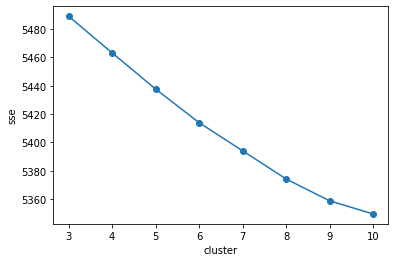

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def elbow(x):
    sse=[]
    for i in range(3,11):
        kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
        kmeans.fit(vec_text)
        sse.append(kmeans.inertia_)
    
    plt.plot(range(3,11), sse, marker='o')
    plt.xlabel('cluster')
    plt.ylabel('sse')
    plt.show()
        
elbow(vec_text)

In [9]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 8, init='k-means++', random_state=0)
#fit the data 
kmeans = kmeans.fit(vec_text)

In [10]:
labels=kmeans.labels_
print(labels)
print(len(labels))

[2 0 2 ... 4 2 4]
5768


In [11]:
clustered=pd.DataFrame(list(zip(data['가수'],data['제목'],labels)),columns=['singer','title','cluster'])

In [12]:
clustered

,singer,title,cluster
0,잼,난 멈추지 않는다,2
1,잼,우리 모두 사랑하자,0
2,잼,이유,2
3,잼,18번가의 비밀,4
4,잼,요즘 친구들,2
...,...,...,...
5763,업텐션 (UP10TION),니가 보여 (Waiting For You),2
5764,업텐션 (UP10TION),빈집 (텅) (Empty House),2
5765,엔플라잉 (N.Flying),From You,4
5766,BLACKPINK,Lovesick Girls,2


In [15]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : 그대, 사랑, 있다, 없다, 마음, 영원하다, 아프다, 눈물, 사람, 같다
1 : la, movin, city, 우연이, high, dna, wow, yeah, ah, take
2 : 있다, 없다, 사랑, 다시, 기억, 같다, 그렇다, 시간, 눈물, 마음
3 : girl, baby, good, 사랑, oh, 없다, beautiful, 있다, my, sorry
4 : baby, 없다, 있다, 사랑, 같다, yeah, oh, 좋다, 그렇다, hey
5 : 사랑, 없다, 사람, 아프다, 있다, 눈물, 가슴, 다시, 이별, 아니다
6 : oh, baby, yeah, 없다, 있다, boy, 같다, ah, eh, no
7 : love, 사랑, my, baby, 있다, 없다, 같다, 마음, heart, hey


In [16]:
clustered.groupby('cluster').count()

,singer,title
cluster,,
0,296,296
1,57,57
2,1342,1342
3,113,113
4,2894,2894
5,636,636
6,214,214
7,216,216


In [17]:
kmeans.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.64799409e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.01510628e-04, 1.62061989e-03, 1.07009000e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.70818071e-04, 1.23606024e-04]])